## <center> Beer Consumption Prediction using ANN

#### This is a regression type of problem in which we will try to predict beer consumption among different age groups.

#### https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

#### Attribute information

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#### Loading the dataset

In [2]:
data = pd.read_csv("Consumo_cerveja.csv", parse_dates=['Data'])

In [3]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
data.rename(columns={"Data":"Date", "Temperatura Media (C)": "Temp_Medium",
                     "Temperatura Minima (C)":"Temp_Min","Temperatura Maxima (C)":"Temp_Max",
                     "Precipitacao (mm)":"Precipitaion", "Final de Semana":"Weekend", 
                     "Consumo de cerveja (litros)":"consumption"}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          365 non-null    datetime64[ns]
 1   Temp_Medium   365 non-null    object        
 2   Temp_Min      365 non-null    object        
 3   Temp_Max      365 non-null    object        
 4   Precipitaion  365 non-null    object        
 5   Weekend       365 non-null    float64       
 6   consumption   365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 51.6+ KB


In [6]:
data.describe()

,Weekend,consumption
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [7]:
data.shape

(941, 7)

In [8]:
data.columns

Index(['Date', 'Temp_Medium', 'Temp_Min', 'Temp_Max', 'Precipitaion',
       'Weekend', 'consumption'],
      dtype='object')

#### Extract day, month and Year from the date column.

In [9]:
data["Day"] = data.Date.dt.day

In [10]:
data['Month'] = data.Date.dt.month

In [11]:
data['Year'] = data.Date.dt.year

In [12]:
data.drop(columns="Date", inplace=True)

In [13]:
data.dropna(inplace=True)

#### Change the datatype into int

In [14]:
data["Day"]= data["Day"].astype("int")
data["Month"]= data["Month"].astype("int")
data["Year"]= data["Year"].astype("int")
data['Weekend'] = data['Weekend'].astype("int")

#### Formating the columns which contains special characters like commas

In [15]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=data[i].str.replace(",",".", regex=True)

In [16]:
data.Year.nunique()

1

##### We may drop the year column as there is only one year is present.

In [17]:
data.drop(columns="Year", inplace=True)

#### Lets change the object data type into float.

In [18]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("float")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp_Medium   365 non-null    float64
 1   Temp_Min      365 non-null    float64
 2   Temp_Max      365 non-null    float64
 3   Precipitaion  365 non-null    float64
 4   Weekend       365 non-null    int32  
 5   consumption   365 non-null    float64
 6   Day           365 non-null    int32  
 7   Month         365 non-null    int32  
dtypes: float64(5), int32(3)
memory usage: 21.4 KB


### Data visualisation

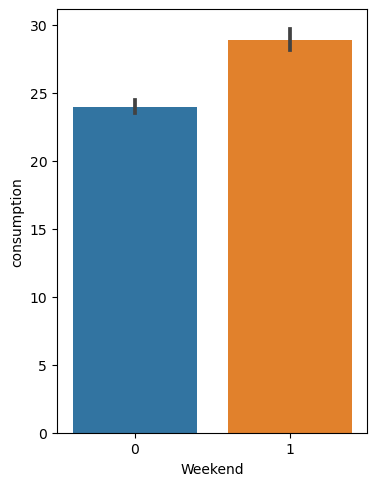

In [20]:
plt.figure(figsize=(4,5.5))
sns.barplot(data =data, x=data.Weekend, y=data.consumption);

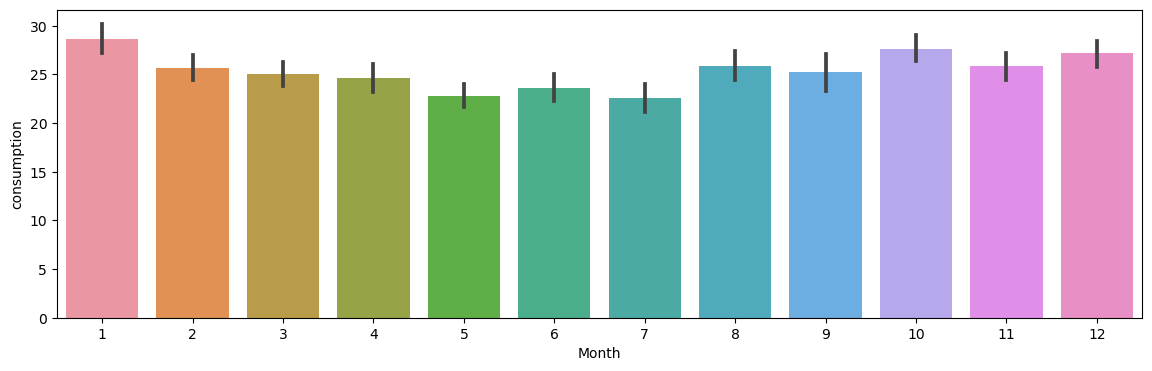

In [21]:
plt.figure(figsize=(14,4))
sns.barplot(data =data, x=data.Month, y=data.consumption);

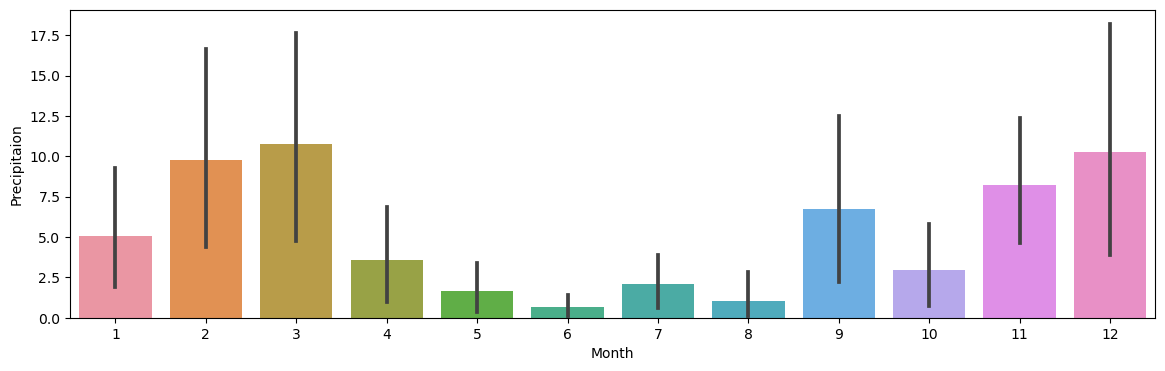

In [22]:
plt.figure(figsize=(14,4))
sns.barplot(data =data, x=data.Month, y=data.Precipitaion);

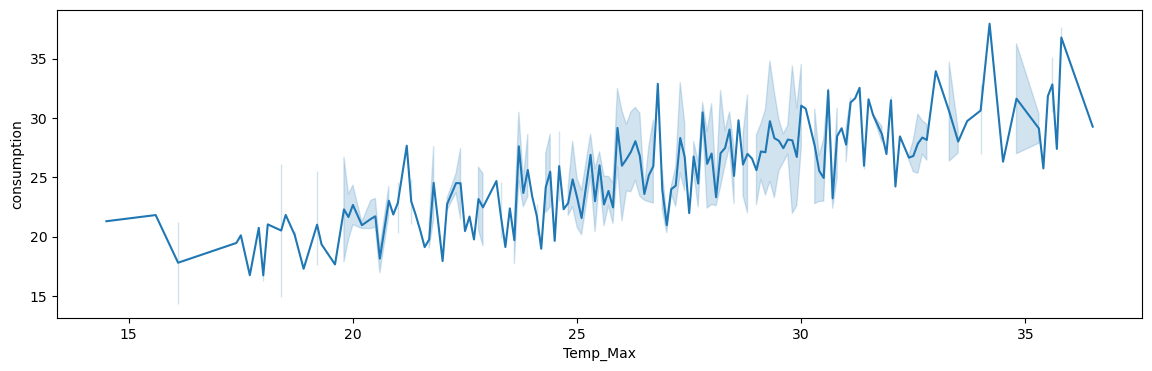

In [23]:
plt.figure(figsize=(14,4))
sns.lineplot(data = data, x=data.Temp_Max, y=data.consumption);

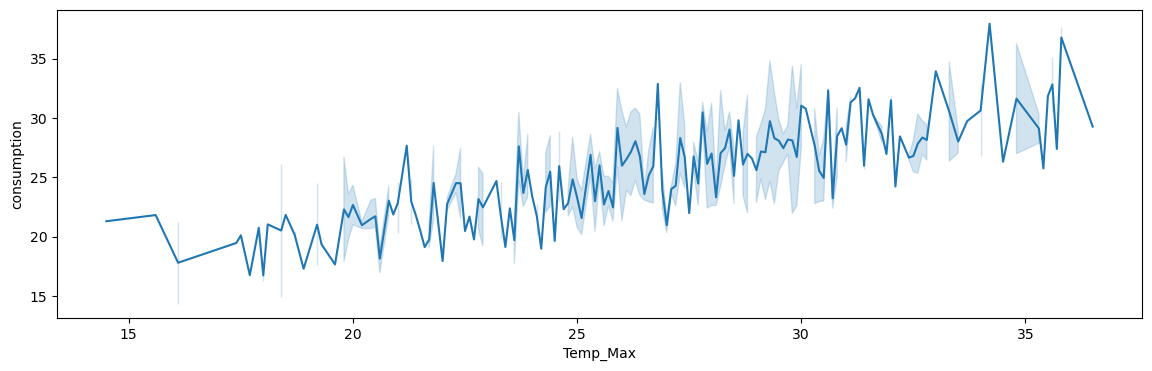

In [24]:
plt.figure(figsize=(14,4))
sns.lineplot(data = data, x=data.Temp_Max, y=data.consumption);

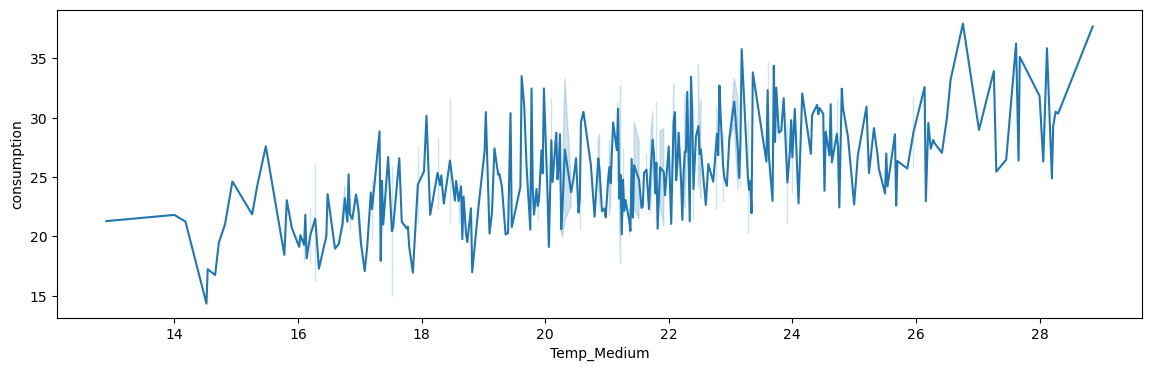

In [25]:
plt.figure(figsize=(14,4))
sns.lineplot(data = data, x=data.Temp_Medium, y=data.consumption);

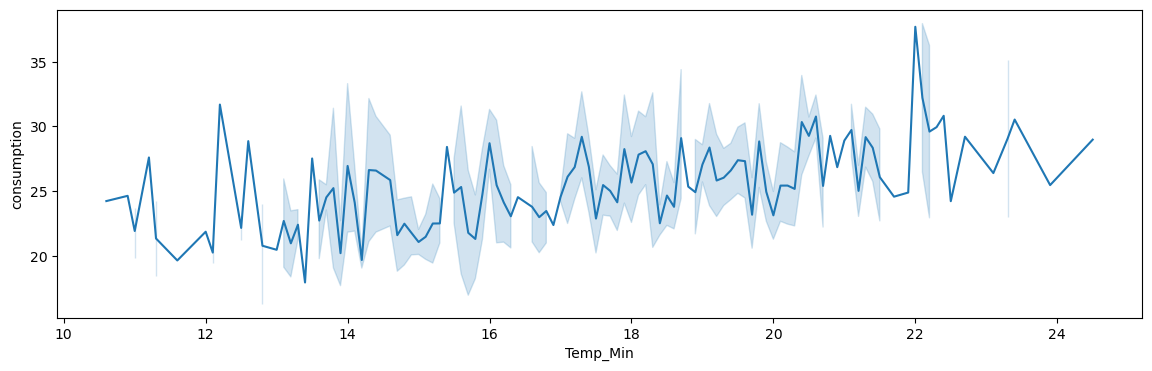

In [26]:
plt.figure(figsize=(14,4))
sns.lineplot(data = data, x=data.Temp_Min, y=data.consumption);

#### Histogram

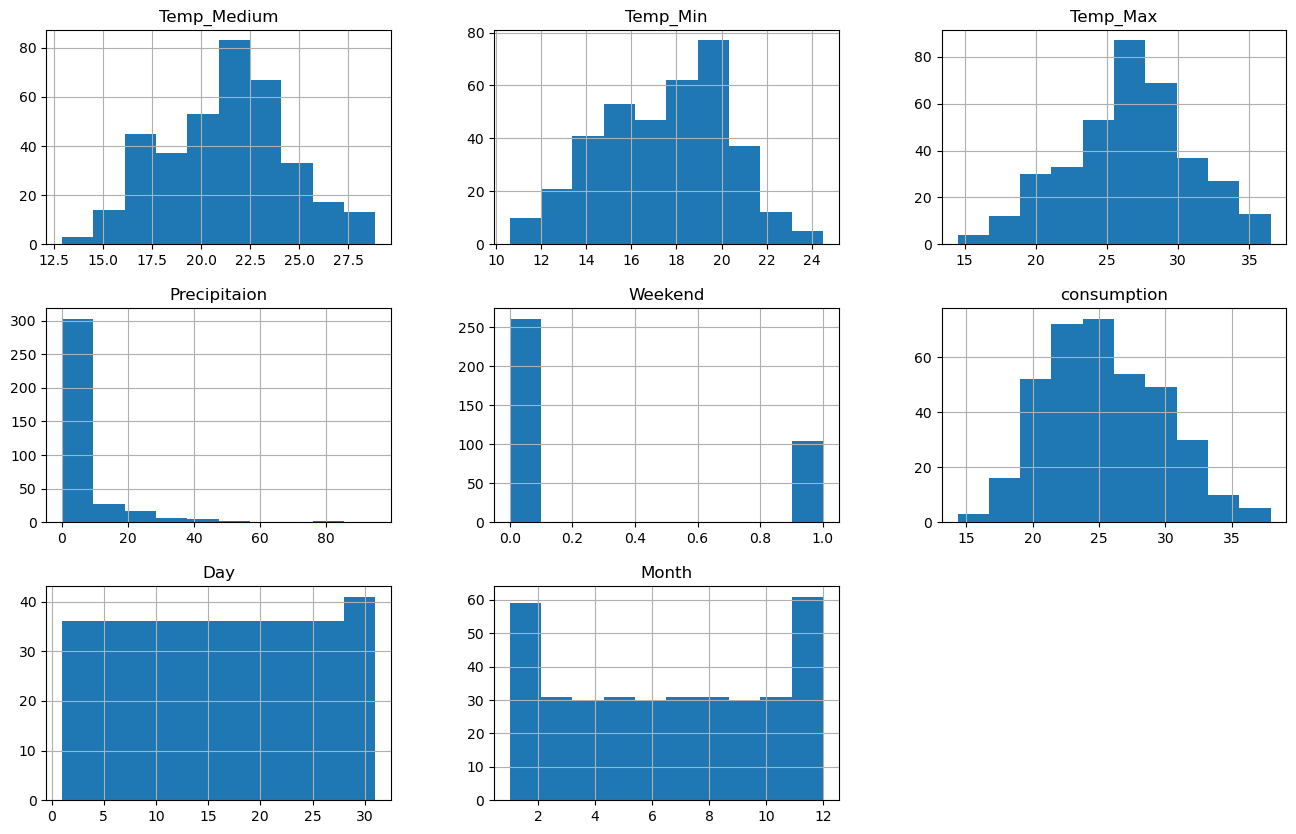

In [27]:
data.hist(figsize=(16,10));

#### Correlation matrix

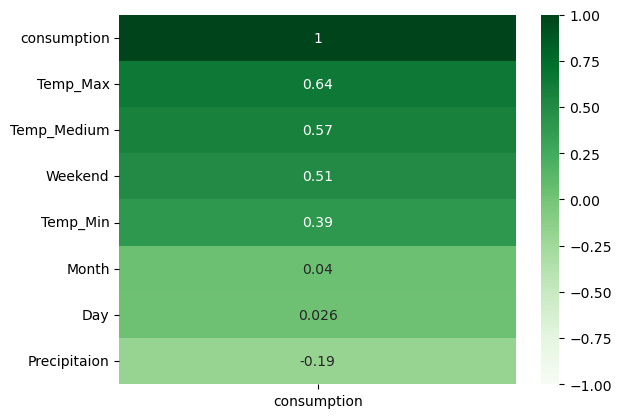

In [28]:
sns.heatmap(data.corr()[["consumption"]].sort_values(by="consumption", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

#### Only some columns are having good correlation with consumption. We may select only those for model building.

In [29]:
data_model = data[['Temp_Medium', 'Temp_Min', 'Temp_Max', 'Weekend', 'consumption']]

In [30]:
x = data_model.iloc[:, :-1].values

In [31]:
y = data_model.iloc[:,-1].values

In [32]:
x.shape

(365, 4)

In [33]:
y.shape

(365,)

#### Splitting the data into training and testing data

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Scaling the data

In [35]:
sc = StandardScaler()

In [36]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Setting the random seed for output reproducibility

In [37]:
tf.random.set_seed(42)

#### Defining the model architecture

In [38]:
model = keras.Sequential()

In [39]:
model.add(Dense(64, activation='relu', input_dim = x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

#### Compiling the model

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Defining early stopping criteria

In [41]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=100,
    verbose=1
)

#### Training the model with early stopping

In [42]:
history = model.fit(x_train, y_train, batch_size=32, epochs=1000, callbacks=[early_stopping], validation_data=(x_test, y_test))

Epoch 1/1000
10/10 [==============================] - 1s 19ms/step - loss: 639.2760 - val_loss: 671.8616
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 608.9786 - val_loss: 641.8513
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 576.9606 - val_loss: 604.4060
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 532.9895 - val_loss: 555.8596
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 482.4942 - val_loss: 493.9667
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 414.5104 - val_loss: 419.7006
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 335.6357 - val_loss: 337.2108
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 261.7693 - val_loss: 252.2720
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 191.0490 - val_loss: 177.7564
Epoch 10/1000
10/10 [==============================] - 0s 4ms/s

Epoch 81/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.7468 - val_loss: 7.5922
Epoch 82/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.3266 - val_loss: 7.3804
Epoch 83/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.5827 - val_loss: 7.7037
Epoch 84/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.6164 - val_loss: 7.4547
Epoch 85/1000
10/10 [==============================] - 0s 4ms/step - loss: 17.2857 - val_loss: 7.4283
Epoch 86/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.8117 - val_loss: 8.3054
Epoch 87/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.3808 - val_loss: 7.7298
Epoch 88/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.7664 - val_loss: 7.2460
Epoch 89/1000
10/10 [==============================] - 0s 4ms/step - loss: 17.1968 - val_loss: 7.1597
Epoch 90/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.8840

10/10 [==============================] - 0s 4ms/step - loss: 14.7990 - val_loss: 7.4003
Epoch 161/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.1023 - val_loss: 7.6039
Epoch 162/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.4678 - val_loss: 6.9077
Epoch 163/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.4257 - val_loss: 7.0762
Epoch 164/1000
10/10 [==============================] - 0s 4ms/step - loss: 14.2608 - val_loss: 7.5158
Epoch 165/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.1055 - val_loss: 8.4100
Epoch 166/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.3473 - val_loss: 7.6246
Epoch 167/1000
10/10 [==============================] - 0s 4ms/step - loss: 11.3310 - val_loss: 7.4162
Epoch 168/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.2359 - val_loss: 7.0930
Epoch 169/1000
10/10 [==============================] - 0s 4ms/step - loss: 14.8803 - va

10/10 [==============================] - 0s 4ms/step - loss: 12.9232 - val_loss: 7.3124
Epoch 240/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.7107 - val_loss: 6.7827
Epoch 241/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.3687 - val_loss: 6.9600
Epoch 242/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.1412 - val_loss: 7.6412
Epoch 243/1000
10/10 [==============================] - 0s 4ms/step - loss: 11.4369 - val_loss: 6.9099
Epoch 244/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.4509 - val_loss: 6.8145
Epoch 245/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.9119 - val_loss: 6.7214
Epoch 246/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.3055 - val_loss: 6.6854
Epoch 247/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.8488 - val_loss: 6.9256
Epoch 248/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.9166 - va

10/10 [==============================] - 0s 4ms/step - loss: 13.4960 - val_loss: 6.8350
Epoch 319/1000
10/10 [==============================] - 0s 4ms/step - loss: 11.9186 - val_loss: 6.6940
Epoch 320/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.0745 - val_loss: 6.7536
Epoch 321/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.6543 - val_loss: 7.2411
Epoch 322/1000
10/10 [==============================] - 0s 4ms/step - loss: 14.2373 - val_loss: 6.9713
Epoch 323/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.4485 - val_loss: 6.8581
Epoch 324/1000
10/10 [==============================] - 0s 4ms/step - loss: 14.7486 - val_loss: 7.3102
Epoch 325/1000
10/10 [==============================] - 0s 4ms/step - loss: 11.6604 - val_loss: 6.8117
Epoch 326/1000
10/10 [==============================] - 0s 4ms/step - loss: 11.2913 - val_loss: 6.6425
Epoch 327/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.4055 - va

10/10 [==============================] - 0s 4ms/step - loss: 12.9056 - val_loss: 7.6123
Epoch 398/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.4945 - val_loss: 7.7823
Epoch 399/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.3391 - val_loss: 6.8297
Epoch 400/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.2169 - val_loss: 6.7804
Epoch 401/1000
10/10 [==============================] - 0s 4ms/step - loss: 13.4565 - val_loss: 7.1133
Epoch 401: early stopping


#### Plotting the training and validation loss over epochs

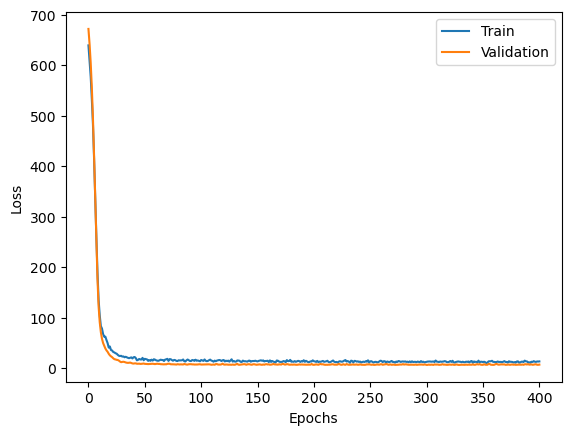

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

#### Making and saving the predictions in a dataframe

In [44]:
x = sc.fit_transform(x)

In [45]:
PREDICTION = model.predict(x)

12/12 [==============================] - 0s 1ms/step


#### r2_score

In [46]:
r2_score(y, PREDICTION)

0.67389396424654

In [47]:
OUTPUT = pd.DataFrame(zip(y, PREDICTION), columns=("ACTUAL", "PREDICTION"))
OUTPUT["PREDICTION"] = OUTPUT["PREDICTION"].astype(float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,25.461,27.529432
1,28.972,28.510456
2,30.814,30.456553
3,29.799,29.532507
4,28.900,24.515493


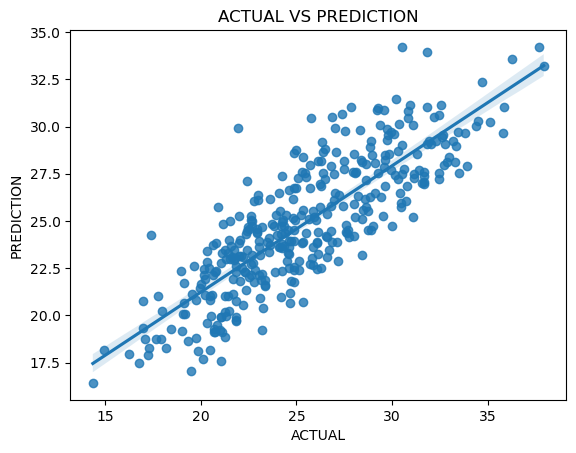

In [48]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.title("ACTUAL VS PREDICTION")
plt.show()